In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('Employee.csv')
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

EDA and PREPROCESSING

In [6]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,4
Job Satisfaction,0
Performance Rating,4
Number of Promotions,5


In [7]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [8]:
#missing value treatment
df['Work-Life Balance'].fillna(df['Work-Life Balance'].mode()[0],inplace=True)
df['Performance Rating'].fillna(df['Performance Rating'].mode()[0],inplace=True)
df['Education Level'].fillna(df['Education Level'].mode()[0],inplace=True)
df['Marital Status'].fillna(df['Marital Status'].mode()[0],inplace=True)
df['Job Level'].fillna(df['Job Level'].mode()[0],inplace=True)
df['Company Size'].fillna(df['Company Size'].mode()[0],inplace=True)
df['Remote Work'].fillna(df['Remote Work'].mode()[0],inplace=True)
df['Employee Recognition'].fillna(df['Employee Recognition'].mode()[0],inplace=True)


In [9]:
df['Number of Promotions'].fillna(df['Number of Promotions'].mode()[0],inplace=True)
df['Number of Dependents'].fillna(df['Number of Dependents'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

,0
Employee ID,0
Age,0
Gender,0
Years at Company,0
Job Role,0
Monthly Income,0
Work-Life Balance,0
Job Satisfaction,0
Performance Rating,0
Number of Promotions,0


In [11]:
df.duplicated().sum()

0

<ipython-input-12-1c3fc4812a27>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='viridis')


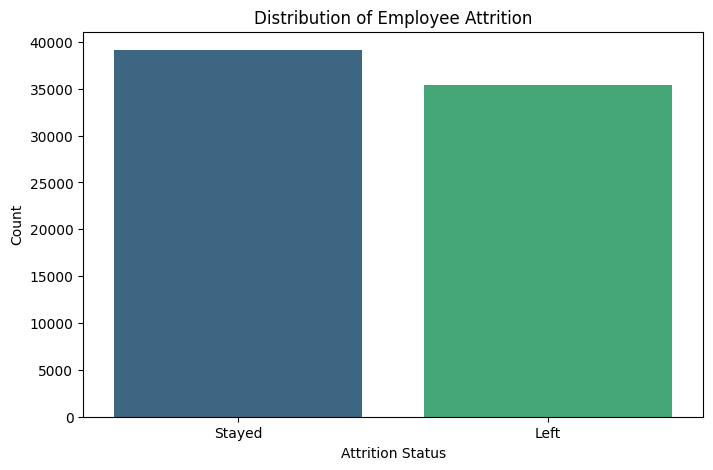

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df, palette='viridis')
plt.title('Distribution of Employee Attrition')
plt.xlabel('Attrition Status')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

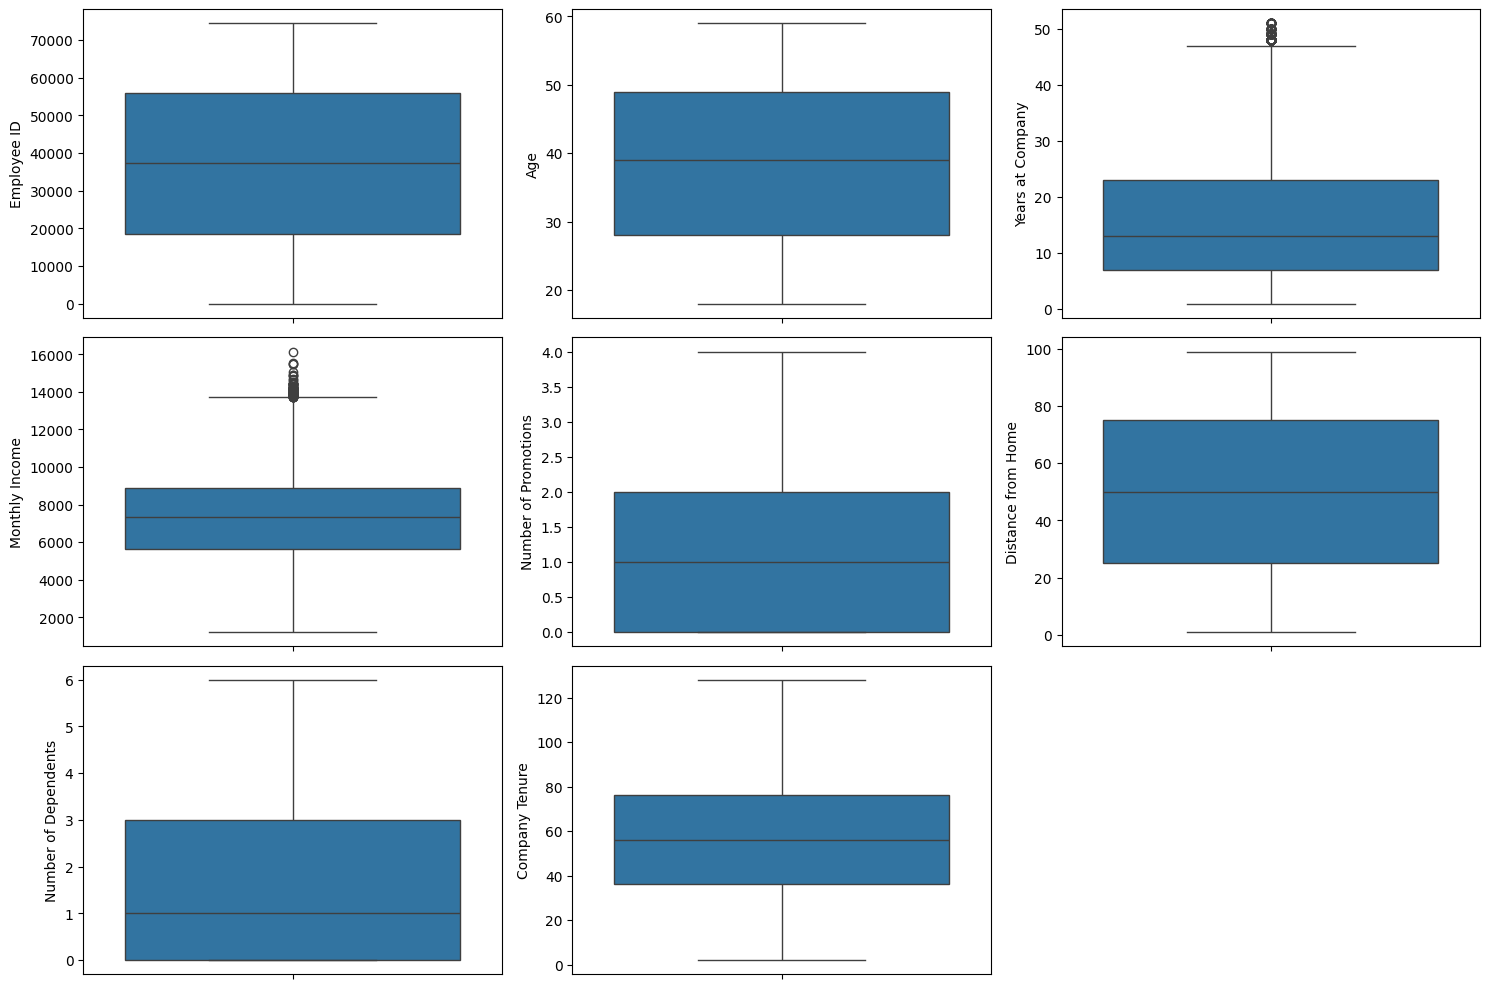

In [13]:
#outliers

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(15,10))
for i,column in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[column])
plt.tight_layout()
plt.show

In [14]:
#treating outliers using iqr

outlier_column = ['Monthly Income','Years at Company']


Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)

IQR = Q3 - Q1

outlier_lower = df[outlier_column] < (Q1-1.5*IQR)
outlier_upper = df[outlier_column] > (Q3+1.5*IQR)

df[outlier_column] = df[outlier_column].clip(lower=Q1-1.5*IQR, upper=Q3+1.5*IQR, axis=1)





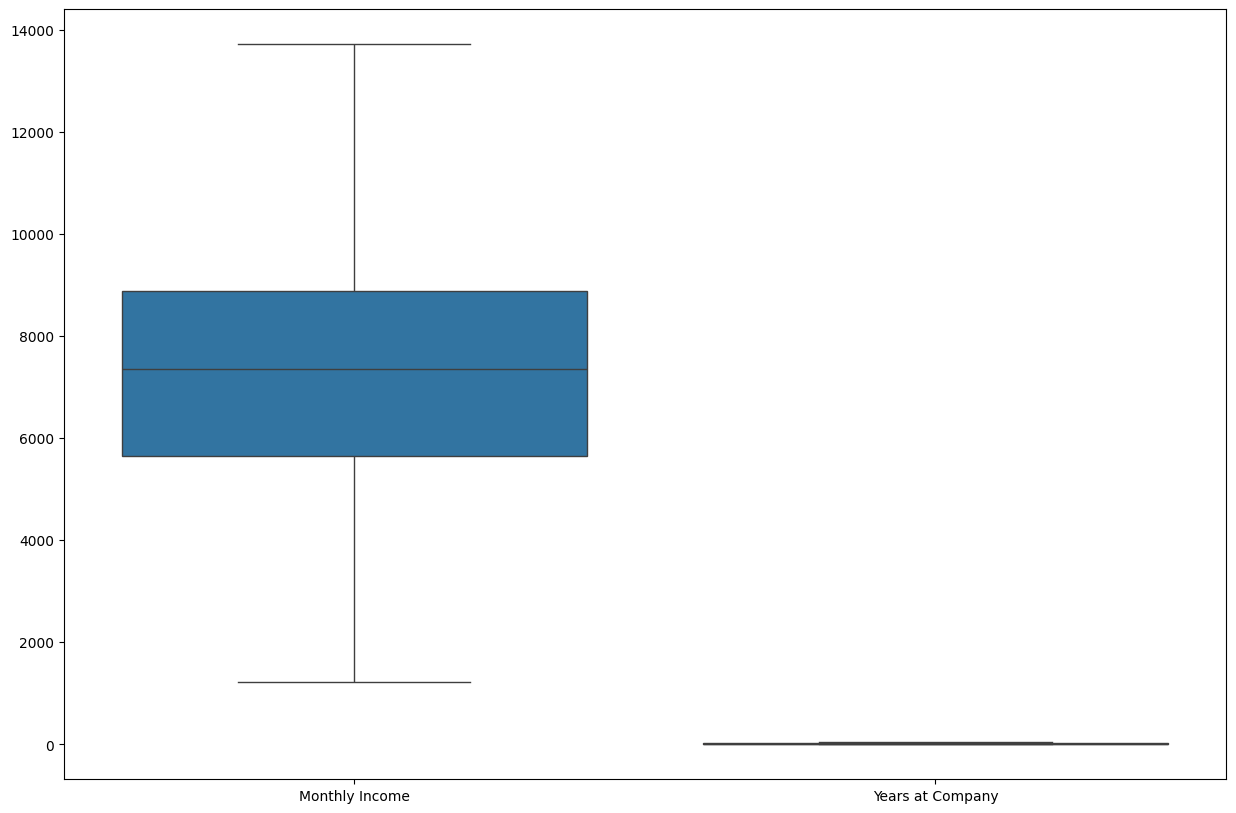

In [15]:
#recheck outlier

outlier_recheck = ['Monthly Income','Years at Company']
plt.figure(figsize=(15,10))
sns.boxplot(df[outlier_recheck])
plt.show()

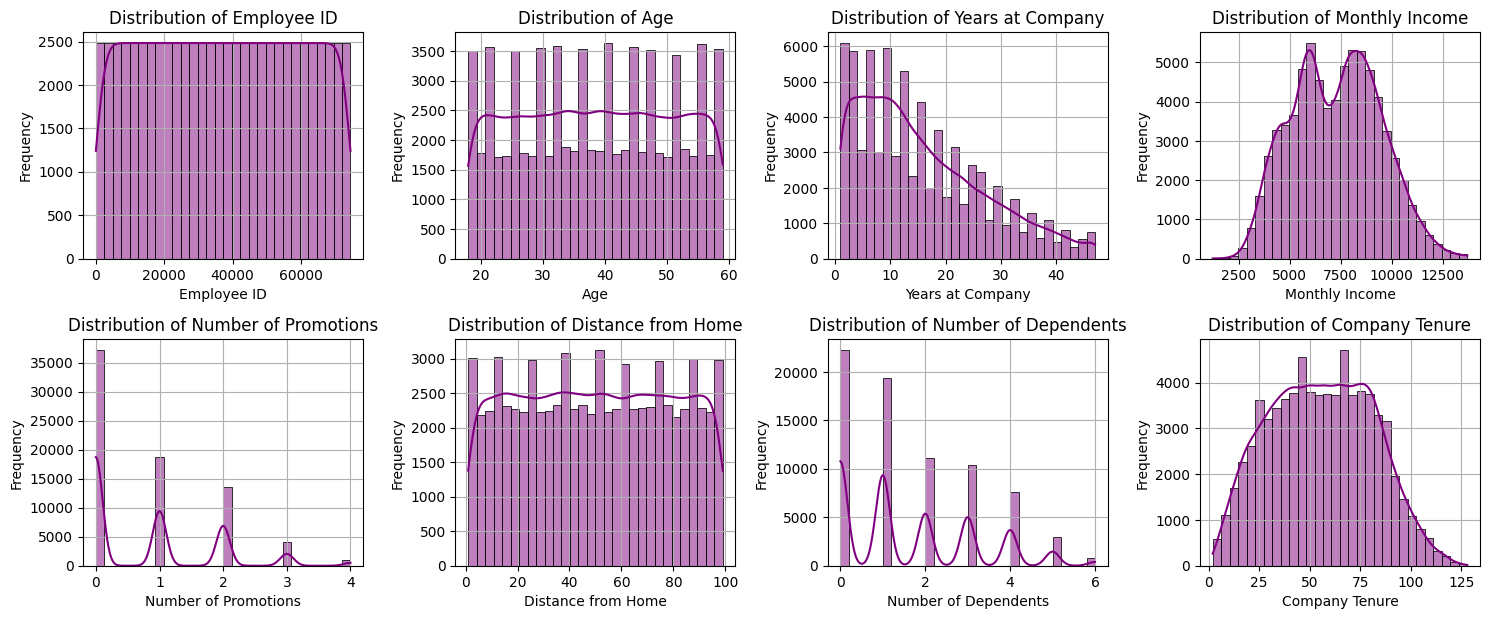

In [16]:
#histogram


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()


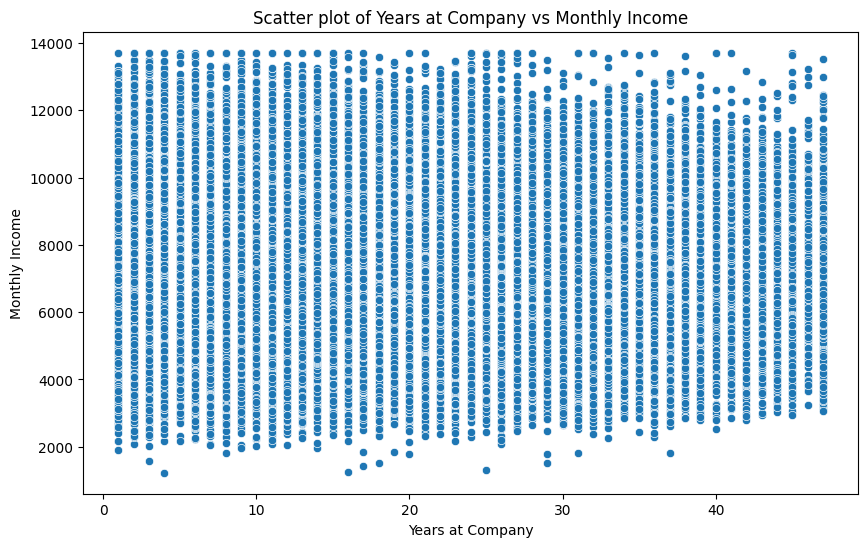

In [17]:
#scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years at Company', y='Monthly Income', data=df)
plt.title('Scatter plot of Years at Company vs Monthly Income')
plt.show()


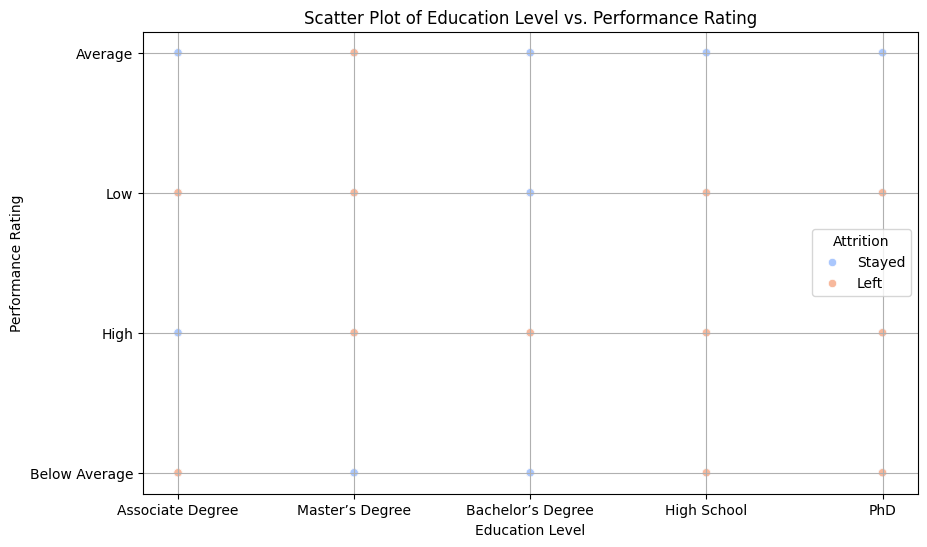

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Education Level'], y=df['Performance Rating'], hue=df['Attrition'], palette='coolwarm')
plt.title('Scatter Plot of Education Level vs. Performance Rating')
plt.xlabel('Education Level')
plt.ylabel('Performance Rating')
plt.grid(True)
plt.show()

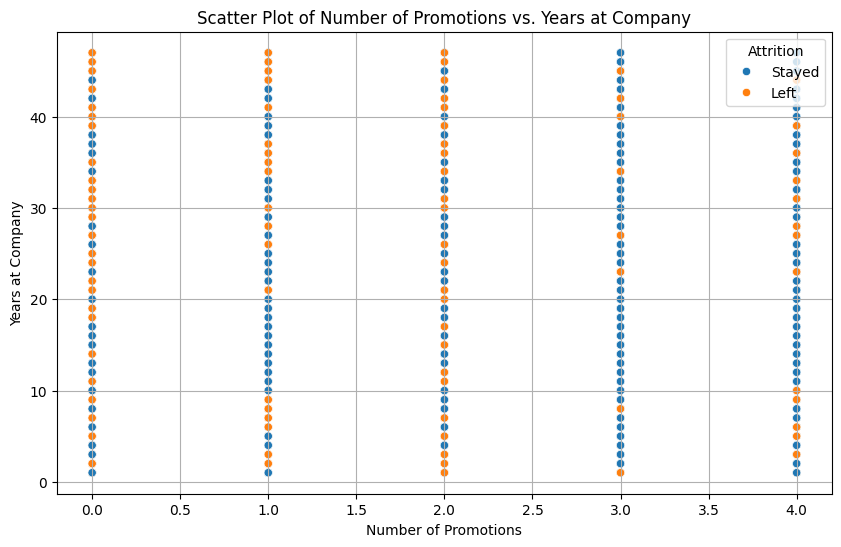

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Number of Promotions'], y=df['Years at Company'], hue=df['Attrition'])
plt.title('Scatter Plot of Number of Promotions vs. Years at Company')
plt.xlabel('Number of Promotions')
plt.ylabel('Years at Company')
plt.grid(True)
plt.show()

ENCODING

In [20]:
df.dtypes

,0
Employee ID,int64
Age,int64
Gender,object
Years at Company,int64
Job Role,object
Monthly Income,int64
Work-Life Balance,object
Job Satisfaction,object
Performance Rating,object
Number of Promotions,float64


In [21]:
df['Innovation Opportunities'] = df['Innovation Opportunities'].map({'No': 0, 'Yes': 1})
df['Leadership Opportunities']=df['Leadership Opportunities'].map({'No':0,'Yes':1})
df['Remote Work']=df['Remote Work'].map({'No':0,'Yes':1})
df['Overtime']=df['Overtime'].map({'No':0,'Yes':1})
df['Attrition']=df['Attrition'].map({'Stayed':1,'Left':0})

In [22]:

df['Work-Life Balance']=df['Work-Life Balance'].map({'Poor':0,'Fair':1,'Good':2,'Excellent':2})
df['Performance Rating']=df['Performance Rating'].map({'Low':0,'Below Average':1,'Average':2,'High':3})
df['Job Satisfaction']=df['Job Satisfaction'].map({'Low':0,'Medium':1,'High':2,'Very High':3})
df['Marital Status']=df['Marital Status'].map({'Single':0,'Married':1,'Divorced':2})

df['Education Level']=df['Education Level'].map({'High School':0,'Associate Degree':1,'Bachelor’s Degree':2,'Master’s Degree':3,'PhD':4})
df['Job Level']=df['Job Level'].map({'Entry':0,'Mid':1,'Senior':2})

df['Company Size']=df['Company Size'].map({'Small':0,'Medium':1,'Large':2})

df['Employee Recognition']=df['Employee Recognition'].map({'Low':0,'Medium':1
                                                            ,'High':2,'Very High':3})
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

df['Job Role']=df['Job Role'].map({'Education':0, 'Media':1,'Healthcare':2,'Technology':3, 'Finance':4})
df['Company Reputation']=df['Company Reputation'].map({'Excellent':3, 'Fair':1, 'Poor':0, 'Good':2})


In [23]:
df.dtypes

,0
Employee ID,int64
Age,int64
Gender,int64
Years at Company,int64
Job Role,int64
Monthly Income,int64
Work-Life Balance,int64
Job Satisfaction,int64
Performance Rating,int64
Number of Promotions,float64


In [24]:
df.corr()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
Employee ID,1.000000,0.003534,-0.001033,0.000496,0.003485,0.000297,0.002521,-0.000314,0.001462,0.006341,...,-0.004049,-0.000687,0.003746,-0.003281,-0.003128,0.002148,0.004056,-0.006296,-0.002351,-0.001935
Age,0.003534,1.000000,-0.003467,0.537264,-0.002365,-0.001758,0.003262,-0.000308,0.000329,0.000650,...,0.003650,-0.001291,-0.003033,0.236337,-0.000702,-0.002444,0.001334,-0.000456,0.000633,0.050801
Gender,-0.001033,-0.003467,1.000000,-0.001610,-0.004727,-0.000814,0.007924,0.002308,0.004503,-0.001460,...,0.001643,0.003342,0.005752,-0.000496,0.001942,0.002261,0.002400,-0.005060,-0.000425,0.100637
Years at Company,0.000496,0.537264,-0.001610,1.000000,-0.003440,-0.005948,0.001323,-0.000274,0.001468,0.000938,...,0.004440,0.002562,-0.000627,0.442566,-0.000488,0.000383,0.002313,-0.000624,-0.002879,0.065419
Job Role,0.003485,-0.002365,-0.004727,-0.003440,1.000000,0.756349,0.005843,-0.007708,0.003185,0.009127,...,-0.000763,-0.003905,-0.005401,-0.007562,-0.002846,-0.003883,0.002068,-0.002752,-0.006051,0.010321
Monthly Income,0.000297,-0.001758,-0.000814,-0.005948,0.756349,1.000000,0.003294,-0.006025,0.003923,0.005602,...,0.001516,-0.002244,0.000125,-0.006960,-0.000019,-0.005108,-0.000638,-0.002454,-0.004968,0.010726
Work-Life Balance,0.002521,0.003262,0.007924,0.001323,0.005843,0.003294,1.000000,-0.003784,0.002657,-0.003879,...,-0.002551,0.000585,0.006823,0.001027,0.000481,-0.002716,0.003804,-0.000126,0.000474,0.182584
Job Satisfaction,-0.000314,-0.000308,0.002308,-0.000274,-0.007708,-0.006025,-0.003784,1.000000,0.001118,0.000690,...,0.006236,-0.001517,0.005497,0.002556,0.000601,0.002104,0.007808,0.005881,0.001888,-0.010899
Performance Rating,0.001462,0.000329,0.004503,0.001468,0.003185,0.003923,0.002657,0.001118,1.000000,0.006361,...,0.002002,-0.000839,0.001521,-0.001539,0.006406,0.001411,0.000838,0.000999,-0.004145,0.049428
Number of Promotions,0.006341,0.000650,-0.001460,0.000938,0.009127,0.005602,-0.003879,0.000690,0.006361,1.000000,...,-0.001428,0.000245,-0.002358,0.005139,0.004710,-0.002540,-0.000281,0.003372,-0.001280,0.081171


In [25]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                          Employee ID       Age    Gender  Years at Company  \
Employee ID                  1.000000  0.003534 -0.001033          0.000496   
Age                          0.003534  1.000000 -0.003467          0.537264   
Gender                      -0.001033 -0.003467  1.000000         -0.001610   
Years at Company             0.000496  0.537264 -0.001610          1.000000   
Job Role                     0.003485 -0.002365 -0.004727         -0.003440   
Monthly Income               0.000297 -0.001758 -0.000814         -0.005948   
Work-Life Balance            0.002521  0.003262  0.007924          0.001323   
Job Satisfaction            -0.000314 -0.000308  0.002308         -0.000274   
Performance Rating           0.001462  0.000329  0.004503          0.001468   
Number of Promotions         0.006341  0.000650 -0.001460          0.000938   
Overtime                     0.005168 -0.000451 -0.000013         -0.002262   
Distance from Home           0.008186 -0.004586 -0.0

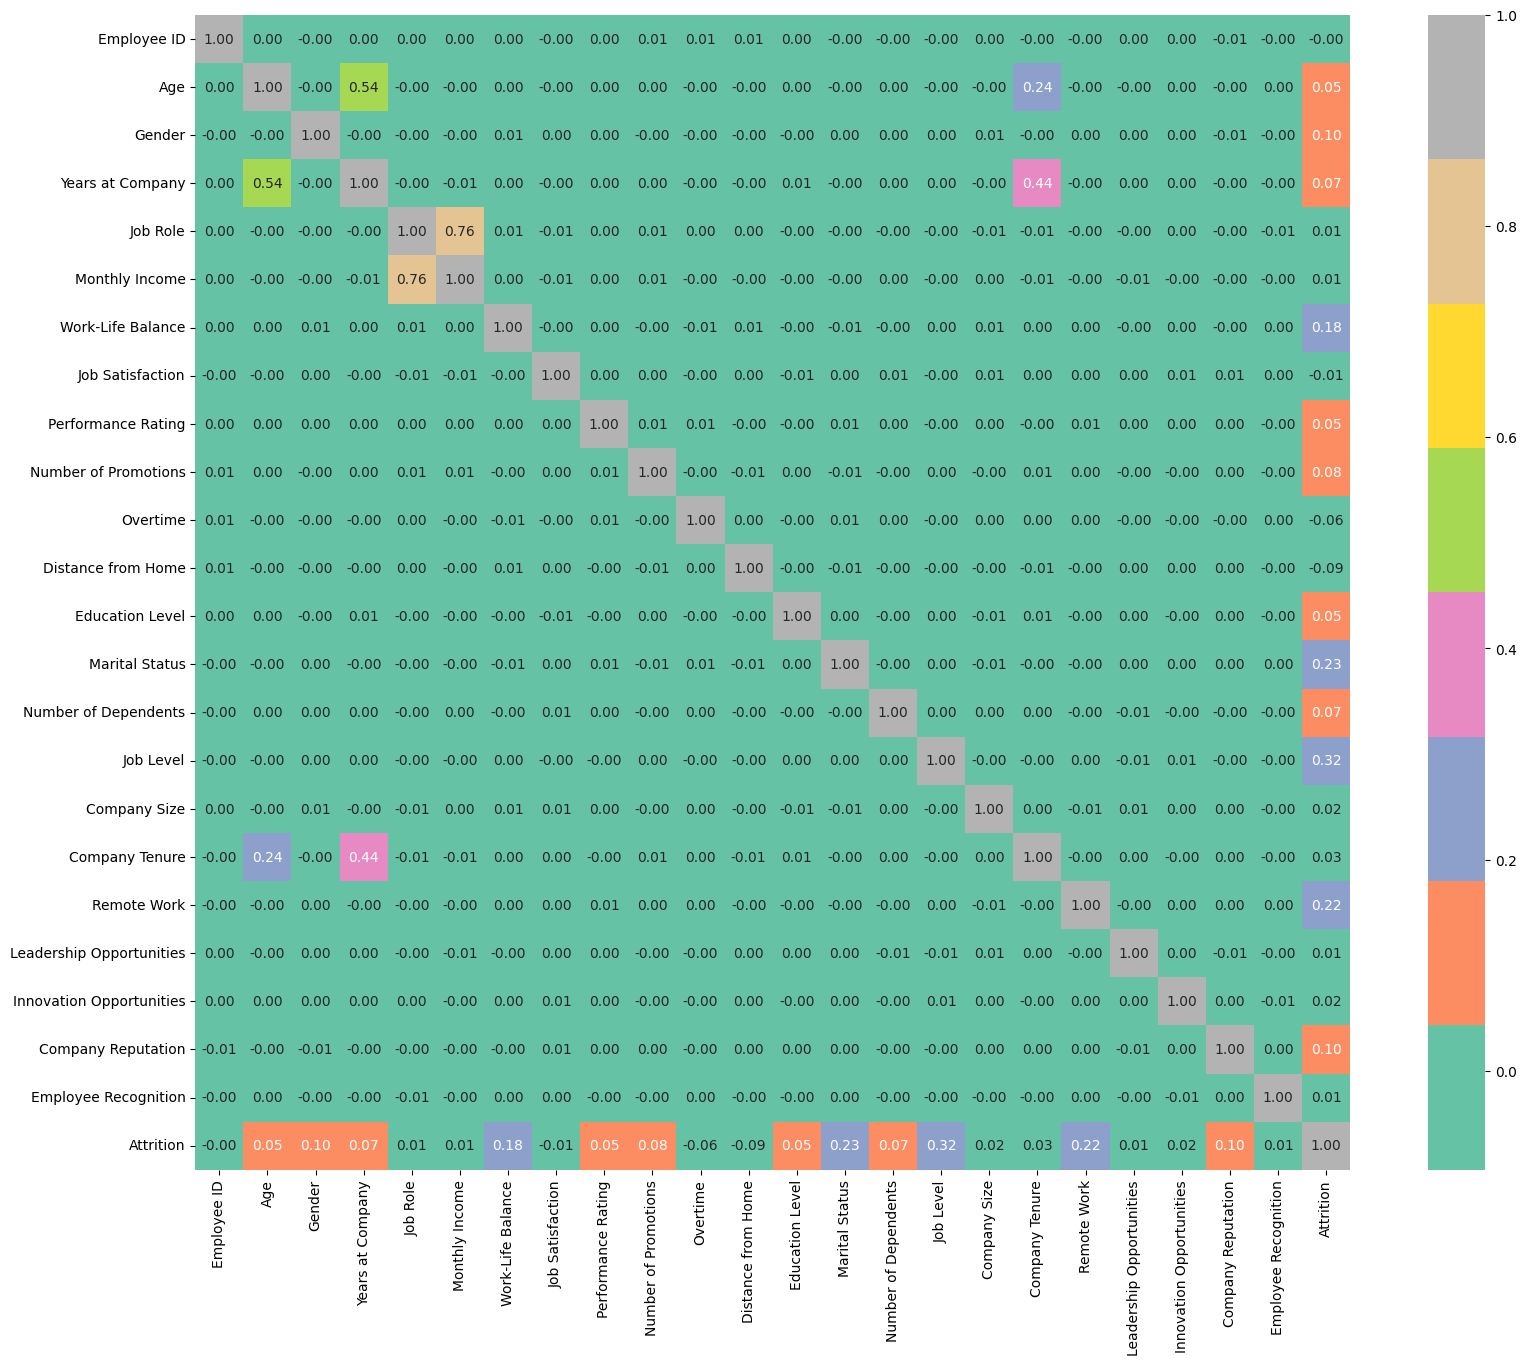

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Set2', cbar=True, square=True)
plt.show()

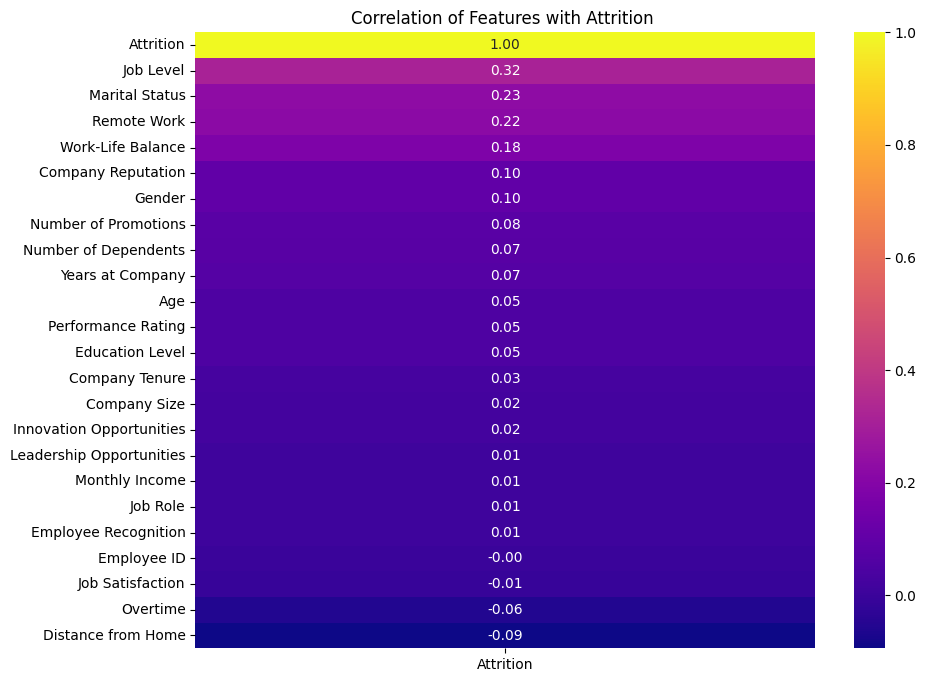

In [27]:

plt.figure(figsize=(10, 8))
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)
sns.heatmap(correlation_with_target.to_frame(), annot=True, fmt=".2f", cmap='plasma', cbar=True)
plt.title('Correlation of Features with Attrition ')
plt.show()

<ipython-input-28-bb17c3313b5b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='bright')


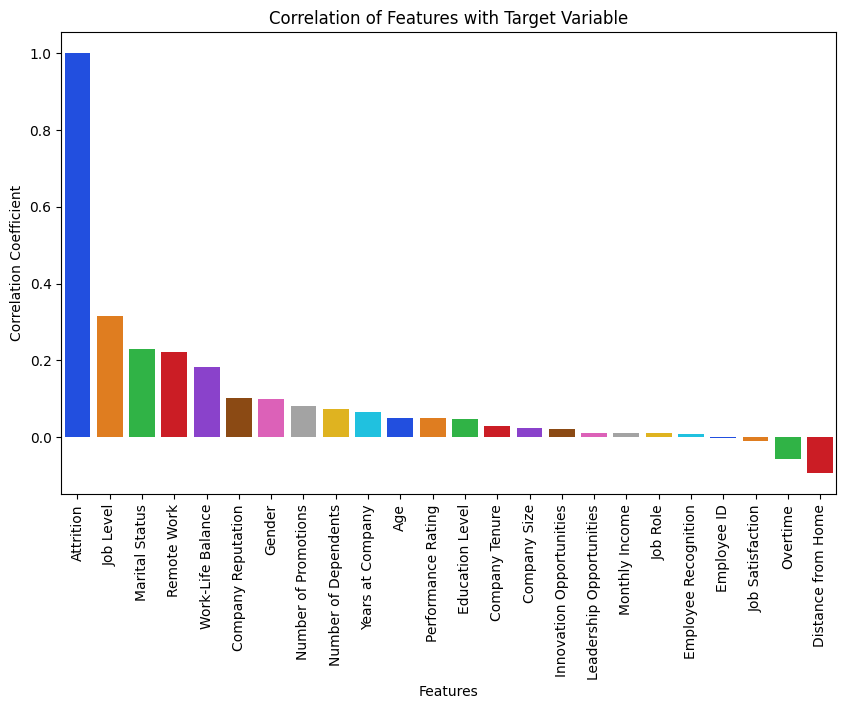

In [28]:
nu= df.select_dtypes(include=['int64', 'float64'])
correlation_matrix=nu.corr()
correlation_with_target = correlation_matrix['Attrition'].sort_values(ascending=False)

# Plotting the correlation with target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='bright')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [29]:
df['Attrition'].value_counts()

,count
Attrition,
1,39128
0,35370


In [30]:
#feature selection


import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [31]:
X = df.drop(columns=['Attrition','Job Role','Monthly Income','Employee Recognition','Job Satisfaction',
                     'Innovation Opportunities','Leadership Opportunities','Company Size','Gender','Employee ID'])
y = df['Attrition']

In [32]:
X.shape

(74498, 14)

In [33]:
#model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [34]:
#train and evaluate models

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.7205
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      7096
           1       0.73      0.75      0.74      7804

    accuracy                           0.72     14900
   macro avg       0.72      0.72      0.72     14900
weighted avg       0.72      0.72      0.72     14900

[[4875 2221]
 [1943 5861]]
Decision Tree Accuracy: 0.6694
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      7096
           1       0.68      0.69      0.69      7804

    accuracy                           0.67     14900
   macro avg       0.67      0.67      0.67     14900
weighted avg       0.67      0.67      0.67     14900

[[4613 2483]
 [2443 5361]]
Random Forest Accuracy: 0.7426
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      7096
           1       0.75      0.75      0.75      7804

    accuracy                 

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
}

# Iterate over models and perform hyperparameter tuning
for model_name, model in models.items():
    print(f'Tuning hyperparameters for {model_name}...')

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Best Model Accuracy: {accuracy:.4f}')
    print('Best Parameters:', grid_search.best_params_)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
